# Donor Choose : KNN

In [1]:
import os

os.chdir('E:\Datasets\DonorChoose')

In [2]:
import pandas as pd

In [3]:
donor = pd.read_csv('cleandonor4.csv')

donor.head(2)
# We removed the redundant features that were taking up space and created a new .csv file

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,project_title
0,Mrs.,IN,0,0,Literacy-Language,ESL Literacy,My students are English learners that are work...,154.6,23,PreK-Two,Educational Support for English Learners at Home
1,Mr.,FL,7,1,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,Six-Eight,Wanted: Projector for Hungry Learners


### Removing Stop Words from title

In [4]:
# We are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [5]:
from tqdm import tqdm
ftitle = [] 

for sen in tqdm( donor['project_title'].values ): 
    strY = " "

    for w in sen.lower().split():
        
        if w not in stopwords:
            strY = strY + w + " "

    ftitle.append( strY.strip() )
    
donor.drop(['project_title'], axis=1, inplace=True)
donor['cleanTitle'] = ftitle

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 89640.03it/s]


In [6]:
donor.shape

(109248, 11)

li = []

for i in donor['project_grade_category'].values :
    s = ""
    for j in i.split(' '): # Will Split based on ,
        j = j.replace('Grades','')   # remove The if present
        j = j.replace('PreK-2', 'PreK-Two')
        j = j.replace('3-5','Three-Five')
        j = j.replace('6-8','Six-Eight')
        j = j.replace('9-12','Nine-Twelve')
        s += j.strip()+" " # Space to seperate two words
    li.append( s.strip() )
donor['cleanProjectGradeCategory'] = li
donor.drop(['project_grade_category'], axis=1, inplace = True)

In [7]:
nan = donor[ donor['teacher_prefix'].isnull() ]
nan

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,cleanTitle


In [8]:
nan = donor[ donor['cleanTitle'].isnull() ]
nan

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,cleanTitle


## Only considering 50k data points to avoid memory issues

In [9]:
donor = donor[0 : 50000]

In [10]:
donor.shape

(50000, 11)

In [11]:
Y = donor['project_is_approved']

len( Y )  # Y = label i.e; Project is approved ( 0 or 1 )

50000

In [12]:
donor.drop( 'project_is_approved', axis=1, inplace=True )

In [13]:
donor.shape

(50000, 10)

In [14]:
X = donor  # X = our features 

In [15]:
X.head(2)

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,cleanTitle
0,Mrs.,IN,0,Literacy-Language,ESL Literacy,My students are English learners that are work...,154.6,23,PreK-Two,educational support english learners home
1,Mr.,FL,7,History-Civics Health-Sports,Civics-Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,Six-Eight,wanted: projector hungry learners


## Splitting Data

In [16]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( X, Y, test_size = 0.33, stratify = Y) # Spliting into Test and Train

# stratify : we need to pass array containing class label as an argument to stratify

xtrain, xcv, ytrain, ycv = train_test_split( xtrain, ytrain, test_size = 0.33, stratify = ytrain )

In [17]:
print( xtrain.shape )
print( xcv.shape )
print( xtest.shape )

print( ytrain.shape )
print( ycv.shape )
print( ytest.shape )

(22445, 10)
(11055, 10)
(16500, 10)
(22445,)
(11055,)
(16500,)


In [18]:
xtrain.head(2)

,teacher_prefix,school_state,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategory,cleanEssay,price,quantity,cleanProjectGradeCategory,cleanTitle
5327,Ms.,CA,155,AppliedLearning,Extracurricular Other,I am so thrilled to start this new school year...,144.81,69,Three-Five,holiday magic!
12025,Ms.,OR,0,Literacy-Language,Literature-Writing,"Ours is a small, rural district with high pove...",5.83,130,Nine-Twelve,world’s video game: teaching ender’s game


# Creating Data Matrix

### Essay BOW

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( min_df = 15, ngram_range=(1,2) )
# ngram_range : The lower and upper boundary of the range of n-values for different n-grams to be extracted.

vect.fit( xtrain['cleanEssay'].values )
# vect.fit( text ): Means that internally it is only learning the vocabulary of `Text` i.e. unique n-grams

# THE VOCABULARY SHOULD BUILT ONLY WITH THE WORDS OF TRAIN DATA

xtrEssayBOW = vect.transform( xtrain['cleanEssay'].values ) 
xcvEssayBOW = vect.transform( xcv['cleanEssay'].values ) 
xteEssayBOW = vect.transform( xtest['cleanEssay'].values )

In [20]:
print( xtrEssayBOW.shape )
print( xcvEssayBOW.shape )
print( xteEssayBOW.shape )

(22445, 46746)
(11055, 46746)
(16500, 46746)


In [21]:
xtrEssayBOW

<22445x46746 sparse matrix of type '<class 'numpy.int64'>'
	with 6853540 stored elements in Compressed Sparse Row format>

### Project title BOW

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( min_df = 15, ngram_range = (1,2) )

vect.fit( xtrain['cleanTitle'].values )

xtrTitleBOW = vect.transform( xtrain['cleanTitle'].values )
xcvTitleBOW = vect.transform( xcv['cleanTitle'].values )
xteTitleBOW = vect.transform( xtest['cleanTitle'].values )

print( xtrTitleBOW.shape )
print( xcvTitleBOW.shape )
print( xteTitleBOW.shape )

(22445, 1103)
(11055, 1103)
(16500, 1103)


### Essay TFIDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidfvect = TfidfVectorizer( min_df = 15 )
tfidfvect.fit( xtrain['cleanEssay'].values )

xtrEssayTFIDF = tfidfvect.transform( xtrain['cleanEssay'].values )
xcvEssayTFIDF = tfidfvect.transform( xcv['cleanEssay'].values )
xteEssayTFIDF = tfidfvect.transform( xtest['cleanEssay'].values )

print( xtrEssayTFIDF.shape )
print( xcvEssayTFIDF.shape )
print( xteEssayTFIDF.shape )

(22445, 7447)
(11055, 7447)
(16500, 7447)


### Essay Word2Vec

In [39]:
# Function Creating a list that contains all the words in the data column

def stow( data ):
    sentence = []

    for sen in tqdm( data.values ):
        fsentence = []
    
        for w in sen.split():
            for cw in w.split():
            
                if cw.isalpha():
                    fsentence.append( cw.lower() )
                else:
                    continue
        sentence.append( fsentence )
    return sentence

In [40]:
xtrw = stow( xtrain['cleanEssay'] ) # List of words for xtrain

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:03<00:00, 7369.03it/s]


In [41]:
print( len( xtrw ) )

import gensim

xtrmodel = gensim.models.Word2Vec( xtrw, min_count = 15, size = 50, workers = 4 )
# min_count : If a word dosent apper more then the value assigned do't construct w2v for it
# size: dimension of vector to be constructed  ( 100 - 300 most cases )
# workers: If you hav a multi cores you can set it to 4 for performence

22445


In [42]:
xtrwords = list( xtrmodel.wv.vocab )
len( xtrwords )

6579

In [43]:
# For Cross validation

xcvw = stow( xcv['cleanEssay'] )

print( len( xcvw ) )

import gensim

xcvmodel = gensim.models.Word2Vec( xcvw, min_count = 15, size =50, workers = 4 )

xcvwords = list( xcvmodel.wv.vocab )
len( xcvwords )

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:01<00:00, 6993.42it/s]


11055


4668

In [44]:
# For Test

xtew = stow( xtest['cleanEssay'] )

print( len( xtew ) )

import gensim

xtemodel = gensim.models.Word2Vec( xtew, min_count = 15, size =50, workers = 4 )

xtewords = list( xtemodel.wv.vocab )
len( xtewords )

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:02<00:00, 7609.99it/s]


16500


5716

### Essay Avg Word 2 Vec

In [45]:
import numpy as np


def avgw2v( data, words, model ):
    sentV = [] # average word 2 vec for each essay is stored in this

    for sent in tqdm( data ):
    
        svec = np.zeros(50)  # creates a np array with 50 0's we took 50 here cause we took 50 as our size in Word2Vec model
        cnw = 0
    
        for w in sent:
            if w in words:
                vec = model.wv[ w ]  # Computing word 2 vec
                svec += vec     # Add it to the svec
                cnw += 1
            
        if cnw != 0:        
            svec /= cnw  # Averaging with the count of number of words with valid vector in the Essay
        sentV.append( svec )
    
    return sentV

In [46]:
xtrAW2V = np.asarray( avgw2v( xtrw, xtrwords, xtrmodel ) )

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [01:10<00:00, 320.53it/s]


In [47]:
xtrAW2V[20]

array([-1.25059635,  0.1914677 ,  0.4374716 , -0.129823  ,  0.76639134,
       -0.54745269, -0.13731124, -0.76674645,  0.32691148,  0.60554792,
       -0.27671862,  0.11046412,  0.1074014 , -0.03526609,  0.14862368,
        0.19721731, -0.14954643, -0.84253739, -0.61805629,  0.31487736,
        0.13128226,  0.53096872,  0.80961438, -0.41581719,  0.64518936,
       -0.50654806,  0.12271502,  0.3414179 ,  0.11816001,  0.13129164,
       -0.63854448,  0.08247713, -0.70874897,  0.60147698,  0.13622182,
       -0.01541794,  0.35403659, -0.09284132,  0.25334305,  0.10145046,
       -0.06626486,  0.21519509, -0.59397861, -0.14992149,  0.24925198,
       -0.42466343, -0.3414171 ,  0.49069866, -0.24426915,  0.06603798])

In [48]:
xcvAW2V = np.asarray( avgw2v( xcvw, xcvwords, xcvmodel ) )

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:28<00:00, 393.28it/s]


In [49]:
xcvAW2V.shape

(11055, 50)

In [50]:
xteAW2V = np.asarray( avgw2v( xtew, xtewords, xtemodel ) )

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:44<00:00, 371.55it/s]


In [51]:
xteAW2V.shape

(16500, 50)

### Essay TFIDF WW2V

In [52]:
print( tfidfvect.get_feature_names()[1000:1020] )
len( tfidfvect.get_feature_names() )

['cables', 'cad', 'caddies', 'cafe', 'cafeteria', 'calculate', 'calculating', 'calculations', 'calculator', 'calculators', 'calculus', 'calendar', 'california', 'call', 'called', 'calling', 'calls', 'calm', 'calmer', 'calming']


7447

In [53]:
essayFeatures = tfidfvect.get_feature_names()  # Tf idf words/ col names

In [54]:
def ww2v( data, model, TFIDF, feat = essayFeatures ):
    
    essayWw2v = []  # the Tfidf weighted w2v for each sentence is stored here
    row = 0

    for sent in tqdm( data ):
        sv = np.zeros( 50 )  # as word vectors are of zero length
        ws = 0  # ws : weight sum, num of words with a valid vector in the sentence/review

        for w in sent:      

            try:
                vec = model.wv[ w ]
                tfidf = TFIDF[ row, feat.index( w ) ]
                # dicti[w] = idf value of word in whole courpus
                # sent.count(w) = tf values of word in this review

                sv += ( vec * tfidf )
                ws += tfidf

            except:
                pass

        if ws != 0:
            sv /= ws
        essayWw2v.append( sv )
        row += 1

    return essayWw2v

In [55]:
xtrWW2V = np.asarray( ww2v( xtrw, xtrmodel, xtrEssayTFIDF ) )

100%|████████████████████████████████████████████████████████████████████████████| 22445/22445 [10:11<00:00, 34.03it/s]


In [56]:
xtrWW2V.shape

(22445, 50)

In [57]:
xcvWW2V = np.asarray( ww2v( xcvw, xcvmodel, xcvEssayTFIDF ) )

100%|████████████████████████████████████████████████████████████████████████████| 11055/11055 [05:41<00:00, 32.37it/s]


In [58]:
xteWW2V = np.asarray( ww2v( xtew, xtemodel, xteEssayTFIDF ) )

100%|████████████████████████████████████████████████████████████████████████████| 16500/16500 [08:26<00:00, 32.57it/s]


### Project Title TFIDF

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidfvect = TfidfVectorizer( min_df = 15 )
tfidfvect.fit( xtrain['cleanTitle'].values )

xtrTitleTFIDF = tfidfvect.transform( xtrain['cleanTitle'].values )
xcvTitleTFIDF = tfidfvect.transform( xcv['cleanTitle'].values )
xteTitleTFIDF = tfidfvect.transform( xtest['cleanTitle'].values )

print( xtrTitleTFIDF.shape )
print( xcvTitleTFIDF.shape )
print( xteTitleTFIDF.shape )

(22445, 847)
(11055, 847)
(16500, 847)


### Title Word2 vec

In [60]:
# For Train

xtrTitlew = stow( xtrain['cleanTitle'] )  # stow : is a defined by me that coverts a list of sentences to words

print( len( xtrTitlew ) )

import gensim

xtrTitlemodel = gensim.models.Word2Vec( xtrTitlew, min_count = 15, size =50, workers = 4 )

xtrTitlewords = list( xtrTitlemodel.wv.vocab )
len( xtrTitlewords )

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 55705.98it/s]


22445


683

In [61]:
# For Cross Validation

xcvTitlew = stow( xcv['cleanTitle'] )

print( len( xcvTitlew ) )

import gensim

xcvTitlemodel = gensim.models.Word2Vec( xcvTitlew, min_count = 15, size =50, workers = 4 )

xcvTitlewords = list( xcvTitlemodel.wv.vocab )
len( xcvTitlewords )

100%|████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 240970.53it/s]


11055


362

In [62]:
# For Test

xteTitlew = stow( xtest['cleanTitle'] )

print( len( xteTitlew ) )

import gensim

xteTitlemodel = gensim.models.Word2Vec( xteTitlew, min_count = 15, size =50, workers = 4 )

xteTitlewords = list( xteTitlemodel.wv.vocab )
len( xteTitlewords )

100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 237673.53it/s]


16500


548

### Title Avg Word 2 vec

In [63]:
# For Train

xtrTitleAW2V = np.asarray( avgw2v( xtrTitlew, xtrTitlewords, xtrTitlemodel ) )

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 27869.84it/s]


In [64]:
xtrTitleAW2V.shape

(22445, 50)

In [65]:
# For Cross validation

xcvTitleAW2V = np.asarray( avgw2v( xcvTitlew, xcvTitlewords, xcvTitlemodel ) )

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 35639.89it/s]


In [66]:
xcvTitleAW2V.shape

(11055, 50)

In [67]:
# For Test

xteTitleAW2V = np.asarray( avgw2v( xteTitlew, xteTitlewords, xteTitlemodel ) )

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 31277.43it/s]


In [68]:
xteTitleAW2V.shape

(16500, 50)

### Title Weighted Word 2 vec

In [69]:
print( tfidfvect.get_feature_names()[0:30] )
len( tfidfvect.get_feature_names() )

['1st', '2016', '2017', '21st', '2nd', '3d', '3rd', '4th', '5th', '6th', 'abc', 'academic', 'access', 'achieve', 'achievement', 'across', 'action', 'active', 'activities', 'activity', 'add', 'adventure', 'adventures', 'again', 'age', 'ahead', 'air', 'algebra', 'alive', 'all']


847

In [70]:
titlefeatures = tfidfvect.get_feature_names()

In [71]:
xtrTitleWW2V = np.asarray( ww2v( xtrTitlew, xtrTitlemodel, xtrTitleTFIDF, titlefeatures ) )

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:02<00:00, 7876.28it/s]


In [72]:
xtrTitleWW2V.shape

(22445, 50)

In [73]:
xcvTitleWW2V = np.asarray( ww2v( xcvTitlew, xcvTitlemodel, xcvTitleTFIDF, titlefeatures ) )

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:01<00:00, 9896.53it/s]


In [74]:
xcvTitleWW2V.shape

(11055, 50)

In [75]:
xteTitleWW2V = np.asarray( ww2v( xteTitlew, xteTitlemodel, xteTitleTFIDF, titlefeatures ) )

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:01<00:00, 9042.65it/s]


In [76]:
xteTitleWW2V.shape

(16500, 50)

### State

In [23]:
vectorizer = CountVectorizer()

vectorizer.fit( xtrain['school_state'].values )

xtrState = vectorizer.transform( xtrain['school_state'].values )
xcvState = vectorizer.transform( xcv['school_state'].values )
xteState = vectorizer.transform( xtest['school_state'].values )

In [24]:
print( xtrState.shape )
print( xcvState.shape )
print( xteState.shape )

(22445, 51)
(11055, 51)
(16500, 51)


In [25]:
print( vectorizer.get_feature_names() )

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### Teacher Prefix

In [26]:
vectorizer = CountVectorizer( vocabulary = ['dr','mr','mrs','ms','teacher'] )

vectorizer.fit( xtrain['teacher_prefix'].values )

xtrPrefix = vectorizer.transform( xtrain['teacher_prefix'].values )
xcvPrefix = vectorizer.transform( xcv['teacher_prefix'].values )
xtePrefix = vectorizer.transform( xtest['teacher_prefix'].values )

In [27]:
print( xtrPrefix.shape )
print( xcvPrefix.shape )
print( xtePrefix.shape )

(22445, 5)
(11055, 5)
(16500, 5)


In [28]:
print( vectorizer.get_feature_names() )

['dr', 'mr', 'mrs', 'ms', 'teacher']


### Category

In [29]:
vectCat = CountVectorizer()

vectCat.fit( xtrain['clean_categories'].values )

xtrCat = vectCat.transform( xtrain['clean_categories'].values )
xcvCat = vectCat.transform( xcv['clean_categories'].values )
xteCat = vectCat.transform( xtest['clean_categories'].values )

print( xtrCat.shape )
print( xcvCat.shape )
print( xteCat.shape )

(22445, 15)
(11055, 15)
(16500, 15)


In [30]:
print( vectCat.get_feature_names() )

['appliedlearning', 'arts', 'care', 'civics', 'health', 'history', 'hunger', 'language', 'literacy', 'math', 'music', 'science', 'specialneeds', 'sports', 'warmth']


### Sub Category

In [31]:
vectSubCat = CountVectorizer()

vectSubCat.fit( xtrain['clean_subcategory'].values )

xtrSubCat = vectSubCat.transform( xtrain['clean_subcategory'].values )
xcvSubCat = vectSubCat.transform( xcv['clean_subcategory'].values )
xteSubCat = vectSubCat.transform( xtest['clean_subcategory'].values )

print( xtrSubCat.shape )
print( xcvSubCat.shape )
print( xteSubCat.shape )

(22445, 37)
(11055, 37)
(16500, 37)


In [32]:
print( vectSubCat.get_feature_names() )

['appliedsciences', 'care', 'careerprep', 'charactereducation', 'civics', 'college', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'fitness', 'foreignlanguages', 'geography', 'government', 'gym', 'health', 'history', 'hunger', 'lifescience', 'literacy', 'literature', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth', 'wellness', 'writing']


### Project Grade Category

In [33]:
vectGCat = CountVectorizer()

vectGCat.fit( xtrain['cleanProjectGradeCategory'].values )

xtrGCat = vectGCat.transform( xtrain['cleanProjectGradeCategory'].values )
xcvGCat = vectGCat.transform( xcv['cleanProjectGradeCategory'].values )
xteGCat = vectGCat.transform( xtest['cleanProjectGradeCategory'].values )

print( xtrGCat.shape )
print( xcvGCat.shape )
print( xteGCat.shape )

(22445, 8)
(11055, 8)
(16500, 8)


### Price

In [34]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['price'].values.reshape(-1,1) )

xtrPrice = norm.transform( xtrain['price'].values.reshape(-1,1) )
xcvPrice = norm.transform( xcv['price'].values.reshape(-1,1) )
xtePrice = norm.transform( xtest['price'].values.reshape(-1,1) )

In [35]:
print( xtrPrice.shape )
print( xcvPrice.shape )
print( xtePrice.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Previously Posted projects

In [36]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

xtrPrev = norm.transform( xtrain['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xcvPrev = norm.transform( xcv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )
xtePrev = norm.transform( xtest['teacher_number_of_previously_posted_projects'].values.reshape(-1,1) )

print( xtrPrev.shape )
print( xcvPrev.shape )
print( xtePrev.shape )

(22445, 1)
(11055, 1)
(16500, 1)


### Quantity

In [37]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()

# norm.fit( xtrain['price'].values ) # gives error : Expected 2D array, got 1D array instead
norm.fit( xtrain['quantity'].values.reshape(-1,1) )

xtrQuan = norm.transform( xtrain['quantity'].values.reshape(-1,1) )
xcvQuan = norm.transform( xcv['quantity'].values.reshape(-1,1) )
xteQuan = norm.transform( xtest['quantity'].values.reshape(-1,1) )

print( xtrPrev.shape )
print( xcvPrev.shape )
print( xtePrev.shape )

(22445, 1)
(11055, 1)
(16500, 1)


# Merging features

### Set 1

In [77]:
from scipy.sparse import hstack

xtr1 = hstack(( xtrEssayBOW, xtrTitleBOW, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv1 = hstack(( xcvEssayBOW, xcvTitleBOW, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte1 = hstack(( xteEssayBOW, xteTitleBOW, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr1.shape, ytrain.shape )
print( xcv1.shape, ycv.shape )
print( xte1.shape, ytest.shape )

(22445, 47968) (22445,)
(11055, 47968) (11055,)
(16500, 47968) (16500,)


### Set 2

In [78]:
from scipy.sparse import hstack

xtr2 = hstack(( xtrEssayTFIDF, xtrTitleTFIDF, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv2 = hstack(( xcvEssayTFIDF, xcvTitleTFIDF, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte2 = hstack(( xteEssayTFIDF, xteTitleTFIDF, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr2.shape, ytrain.shape )
print( xcv2.shape, ycv.shape )
print( xte2.shape, ytest.shape )

(22445, 8413) (22445,)
(11055, 8413) (11055,)
(16500, 8413) (16500,)


### Set 3

In [79]:
from scipy.sparse import hstack

xtr3 = hstack(( xtrAW2V, xtrTitleAW2V, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv3 = hstack(( xcvAW2V, xcvTitleAW2V, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte3 = hstack(( xteAW2V, xteTitleAW2V, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr3.shape, ytrain.shape )
print( xcv3.shape, ycv.shape )
print( xte3.shape, ytest.shape )

(22445, 219) (22445,)
(11055, 219) (11055,)
(16500, 219) (16500,)


### Set 4

In [80]:
from scipy.sparse import hstack

xtr4 = hstack(( xtrWW2V, xtrTitleWW2V, xtrState, xtrPrefix, xtrCat, xtrSubCat, xtrGCat, xtrPrice, xtrPrev, xtrQuan )).tocsr()
xcv4 = hstack(( xcvWW2V, xcvTitleWW2V, xcvState, xcvPrefix, xcvCat, xcvSubCat, xcvGCat, xcvPrice, xcvPrev, xcvQuan )).tocsr()
xte4 = hstack(( xteWW2V, xteTitleWW2V, xteState, xtePrefix, xteCat, xteSubCat, xteGCat, xtePrice, xtePrev, xteQuan )).tocsr()

print( xtr4.shape, ytrain.shape )
print( xcv4.shape, ycv.shape )
print( xte4.shape, ytest.shape )

(22445, 219) (22445,)
(11055, 219) (11055,)
(16500, 219) (16500,)


## Applying KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

In [82]:
def batchPredict( data, classifier ): # Predict the probablity of data points in batch i.e; some data points at once 
    
    yPred = []
    
    loop = data.shape[0] - data.shape[0] % 1000   # data.shape[0] : no of rows in data matrix
    # for ex data shape = 4489 then loop = 4489 - 4489%1000 = 4489 - 489 = 4000 
    # Now we can divide our loop into 4 interval of 1000s and one remaining 489
    # ie; 1-1000 in 1st iteration 1000-2000 in 2nd iteration 2000-3000 in 3rd 3000-4000 in 4th and 4000-4489 in the last iteraion
    
    for i in range( 0, loop, 1000 ):
        # If loop = 4000 Computes proba for 0 - 4000 in 4 iterations
       
        yPred.extend( classifier.predict_proba( data[i : i+1000] )[ :, 1] ) # [ :, 1] : All row Only 1 col
        # predict_proba : Return probability estimates for the test data X.

    yPred.extend( classifier.predict_proba( data[ loop : ] )[ :, 1 ] )
    # computes probab for remaining points

    return yPred

OR

In [83]:
def Predict( data, classifier ): # Predicts the probability of data points all at once
    
    yPred = []
        
    yPred.extend( classifier.predict_proba( data )[:, 1] )
    
    return yPred

We can use Predict as well as batch Predict

batchPredict() Predicts the data points in batches of 1000 whereas Predict() does it at once

Use Batch Prediction when dealing with large dataset and in case of memory Limitation<br><br>

## Opeartions on Set 1

      - First -           - Second -           - Third -           - Fourth -           - Fifth -           - Sixth -
#################### #################### #################### #################### #################### #################### #################### 

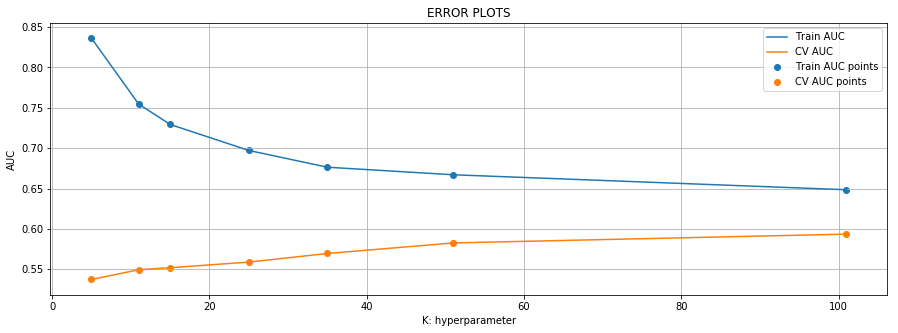

In [84]:
trAUC = []
cvAUC = []
K = [ 5, 11, 15, 25, 35, 51, 101]

print(' '*5,'- First -', ' '*9,'- Second -', ' '*9,'- Third -', ' '*9,'- Fourth -', ' '*9,'- Fifth -', ' '*9,'- Sixth -')

for i in K:
    
    neigh = KNeighborsClassifier( n_neighbors = i )
    neigh.fit(xtr1, ytrain)

    ytrPred = batchPredict( xtr1, neigh )    
    ycvPred = batchPredict( xcv1, neigh )

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs 
    
    trAUC.append( roc_auc_score( ytrain, ytrPred ))
    cvAUC.append( roc_auc_score( ycv, ycvPred ))

    print('#'*20, end =' ' )

plt.figure( figsize = ( 15, 5 ) )
    
plt.plot( K, trAUC, label = 'Train AUC')
plt.plot( K, cvAUC, label = 'CV AUC')

plt.scatter( K, trAUC, label = 'Train AUC points')
plt.scatter( K, cvAUC, label = 'CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [85]:
# We choose K such that, we will have min gap between the train and CV AUC score and max AUC on CV data 

bestK = 101


In [86]:
## Understanding roc_curve()
import numpy as np
from sklearn import metrics

y = np.array([0, 0, 1, 1])    # Actual Label
scores = np.array([0.1, 0.4, 0.35, 0.8])  # Predicted Scores/ Probablistic Estimate

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
# roc_curve() : Compute Receiver operating characteristic (ROC),
# this implementation is restricted to the binary classification task.
# If it isn't binary i.e; class labels are 1 and 2 there is a parameter called pos_label in roc_curve
# pos_label : Label considered as positive and others are considered negative. pos_label=2 means 2 is +ve 1 is -ve
# roc_curve( yTrue, yScore ) : yTrue = True Binary labels, yScore = Target values Probablistic estimate, confidence values etc
# The func returns 3 arrays : fpr = false Positive rates, tpr = True Positive rates, Threshold 

print( fpr )
print( tpr )
print( thresholds )

print( np.argmax( fpr*( 1 - tpr ) ) )   # argmax : Returns the indices of the maximum values along an axis.

t = thresholds[ np.argmax( fpr*( 1 - tpr ) ) ] 
print(t)

[0.  0.5 0.5 1. ]
[0.5 0.5 1.  1. ]
[0.8  0.4  0.35 0.1 ]
1
0.4


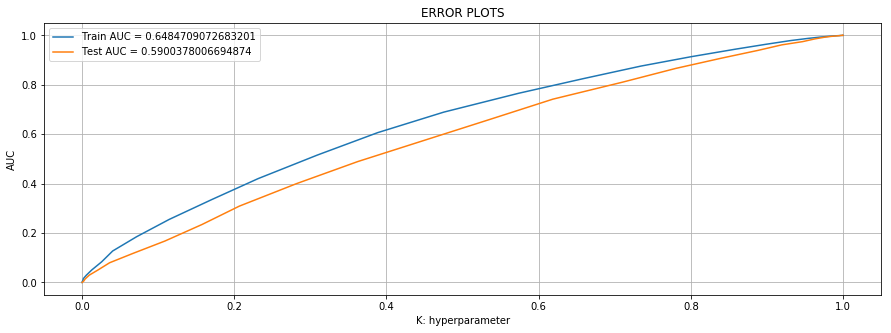

In [87]:
from sklearn.metrics import roc_curve, auc

neigh = KNeighborsClassifier( n_neighbors = bestK )
neigh.fit( xtr1, ytrain )

yTrainPred = batchPredict( xtr1, neigh )

yTestPred = batchPredict( xte1, neigh )

trFPR, trTPR, trThreshold = roc_curve( ytrain, yTrainPred ) # ytrain and YTrainPred must have same no. of points
teFPR, teTPR, teThreshold = roc_curve( ytest, yTestPred )

# roc_curve() : Compute Receiver operating characteristic (ROC),
# this implementation is restricted to the binary classification task.
# roc_curve( yTrue, yScore ) : yTrue = True Binary labels, yScore = Target values Probablistic estimate, confidence values etc
# The func returns 3 arrays : fpr = false Positive rates, tpr = True Positive rates, Threshold 

plt.figure( figsize = (15, 5) )
plt.plot( trFPR, trTPR, label="Train AUC = " + str( auc( trFPR, trTPR ) ) )
plt.plot( teFPR, teTPR, label="Test AUC = " + str( auc( teFPR, teTPR ) ) )

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [88]:
# Understanding Confusion Matrix
from sklearn.metrics import confusion_matrix

ytrue = [2, 0, 2, 2, 0, 1]  # Three class ;abels : 0, 1, 2 i.e; we will get a 3x3 Confusion Matrix 
ypred = [0, 0, 2, 2, 0, 2]

print( confusion_matrix( ytrue, ypred ) )

# Let Xab be : Data point X is actually 'a' but is Predicted to be 'b' => X01 data point X is 0 predicted to be 1

#            Actual->        0     1      2
# Predicted->           0   X00   X10    X20        X20 : X is actually 2 but is predicted 0 i;e False Predicted
#                       
#                       1   X01   X11    X21        # X00, X11, X22 are the only data points that are correctly predicted
#                       
#                       2   X02   X12    X22       # Our model is good if the diagonal values are high

[[2 0 0]
 [0 0 1]
 [1 0 2]]


In [89]:
def predictCM( probab, threshold, fpr, tpr ):
    
    t = threshold[ np.argmax( fpr*( 1 - tpr ) ) ]  # returns the threshold val for the point with max fpr(1-tpr) value
    # fpr*( 1 - tpr ) will be high if fpr is high and tpr is low, argmax : Returns the indices of the maximum val along an axis
    
    print(" The maximum value of tpr*(1-fpr) = ", max( tpr*(1-fpr) ), " for threshold = ", np.round(t,3))
    
    pred = []
    for i in probab: # i = Probaility for all data points
        if i >= t:   #  if Probablity of a point is >= the Threshold value i,e; Threshold at index of max val of fpr(1-tpr) 
            pred.append(1)
        else:
            pred.append(0)
            
    return pred

Confusion Matrix for Train 1 
 The maximum value of tpr*(1-fpr) =  0.37079284771904064  for threshold =  0.832
[[ 2118  1345]
 [ 7474 11508]]


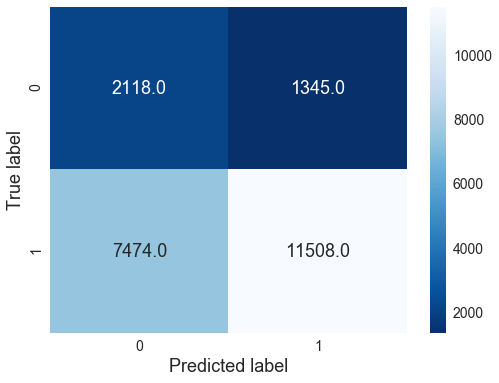



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.3163350605136099  for threshold =  0.832
[[1389 1157]
 [5863 8091]]


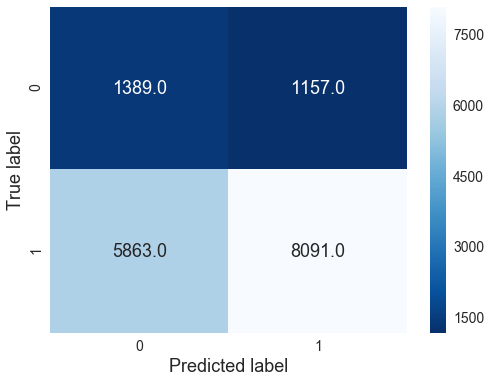

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


print("Confusion Matrix for Train 1 ")
predicted = predictCM( yTrainPred, trThreshold, trFPR, trTPR )

cmtr = confusion_matrix( ytrain, predicted )
print( cmtr  )

plt.figure( figsize = (8,6) )
sn.set( font_scale = 1.4 ) #for label size
sn.heatmap( cmtr, fmt=".1f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
plt.ylabel('True label', size=18)
plt.xlabel('Predicted label', size=18)
plt.show()
plt.close()



print("\n\nConfusion Matrix for Test 1 ")
predicted = predictCM( yTestPred, teThreshold, teFPR, teTPR )

cmte = confusion_matrix( ytest, predicted )
print( cmte )

plt.figure( figsize = (8,6) )
sn.set( font_scale = 1.4 ) #for label size
sn.heatmap( cmte, fmt=".1f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
plt.ylabel('True label', size=18)
plt.xlabel('Predicted label', size=18)
plt.show()
plt.close()



In [91]:
import importlib
importlib.reload(sn)

<module 'seaborn' from 'D:\\Anaconda\\lib\\site-packages\\seaborn\\__init__.py'>

## Creating functions for Code reusability

### Function to Apply KNN on different K & finding best K using AUC 

In [92]:
def batchPredict( data, classifier ): # Predict the probablity of data points in batch i.e; some data points at once 
    
    yPred = []
    
    loop = data.shape[0] - data.shape[0] % 1000   # data.shape[0] : no of rows in data matrix
    # for ex data shape = 4489 then loop = 4489 - 4489%1000 = 4489 - 489 = 4000 
    # Now we can divide our loop into 4 interval of 1000s and one remaining 489
    # ie; 1-1000 in 1st iteration 1000-2000 in 2nd iteration 2000-3000 in 3rd 3000-4000 in 4th and 4000-4489 in the last iteraion
    
    for i in range( 0, loop, 1000 ):
        # If loop = 4000 Computes proba for 0 - 4000 in 4 iterations
       
        yPred.extend( classifier.predict_proba( data[i : i+1000] )[ :, 1] ) # [ :, 1] : All row Only 1 col
        # predict_proba : Return probability estimates for the test data X.

    yPred.extend( classifier.predict_proba( data[ loop : ] )[ :, 1 ] )
    # computes probab for remaining points

    return yPred

In [93]:
def BestK( xtr, xcv, ytr, ycv ):
    
    trAUC = []
    cvAUC = []
    K = [ 5, 11, 15, 25, 51, 101]

    print(' '*5,'- First -', ' '*9,'- Second -', ' '*9,'- Third -', ' '*9,'- Fourth -', ' '*9,'- Fifth -', ' '*9,'- Sixth -')
    for i in K :

        neigh = KNeighborsClassifier( n_neighbors = i )
        neigh.fit(xtr, ytr)

        ytrPred = batchPredict( xtr, neigh )    
        ycvPred = batchPredict( xcv, neigh )

        # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
        # not the predicted outputs 

        trAUC.append( roc_auc_score( ytr, ytrPred ))
        cvAUC.append( roc_auc_score( ycv, ycvPred ))
        
        print('#'*20, end =' ' )

    plt.figure( figsize = ( 15, 5 ) )

    plt.plot( K, trAUC, label = 'Train AUC')
    plt.plot( K, cvAUC, label = 'CV AUC')

    plt.scatter( K, trAUC, label = 'Train AUC points')
    plt.scatter( K, cvAUC, label = 'CV AUC points')

    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()


### <br>Function to convert Predicted Score to Binary and creating Confusion Matrix

In [94]:
def predictCM( probab, threshold, fpr, tpr ):
    
    t = threshold[ np.argmax( fpr*( 1 - tpr ) ) ]  # returns the threshold val for the point with max fpr(1-tpr) value
    # fpr*( 1 - tpr ) will be high if fpr is high and tpr is low, argmax : Returns the indices of the maximum val along an axis
    
    print(" The maximum value of tpr*(1-fpr) = ", max( tpr*(1-fpr) ), " for threshold = ", np.round(t,3))
    
    pred = []
    for i in probab: # i = Probability for all data points
        if i >= t:   #  if Probablity of a point is >= the Threshold value i,e; Threshold at index of max val of fpr(1-tpr) 
            pred.append(1)
        else:
            pred.append(0)
            
    return pred

In [95]:
def cm( ytr, yte, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno ):
    
    print("Confusion Matrix for Train of Set ", sno)
    
    predicted = predictCM( yTrainPred, trThreshold, trFPR, trTPR )
    cmtr = confusion_matrix( ytr, predicted )
    print( cmtr  )

    plt.figure( figsize = (8,6) )
    sn.set( font_scale = 1.4 ) #for label size
    sn.heatmap( cmtr,fmt=".1f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.show()
    plt.close()



    print("\n\nConfusion Matrix for Test 1 ")
    predicted = predictCM( yTestPred, teThreshold, teFPR, teTPR )

    cmte = confusion_matrix( yte, predicted )
    print( cmte )

    plt.figure( figsize = (8,6) )
    sn.set( font_scale = 1.4 ) #for label size
    sn.heatmap( cmte,fmt=".1f", annot = True, annot_kws={"size": 18}, cmap='Blues_r' )# font size
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)
    plt.show()
    plt.close()
    
    importlib.reload(sn)

### <br>Function to Predict probabilistic score and appling roc_curve()

In [96]:
def roc( xtr, xte, ytr, yte, bestK, sno ):
    
    neigh = KNeighborsClassifier( n_neighbors = bestK )
    neigh.fit( xtr, ytr )

    yTrainPred = batchPredict( xtr, neigh )    
    yTestPred = batchPredict( xte, neigh )

    trFPR, trTPR, trThreshold = roc_curve( ytr, yTrainPred ) # ytrain and YTrainPred must have same no. of points
    teFPR, teTPR, teThreshold = roc_curve(yte, yTestPred )

    # roc_curve() : Compute Receiver operating characteristic (ROC),
    # this implementation is restricted to the binary classification task.
    # roc_curve( yTrue, yScore ) : yTrue = True Binary labels, yScore = Target values Probablistic estimate, confidence values etc
    # The func returns 3 arrays : fpr = false Positive rates, tpr = True Positive rates, Threshold 

    plt.figure( figsize = (15, 5) )
    plt.plot( trFPR, trTPR, label="Train AUC = " + str( auc( trFPR, trTPR ) ) )
    plt.plot( teFPR, teTPR, label="Test AUC = " + str( auc( teFPR, teTPR ) ) )

    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS for Set "+str(sno))
    plt.grid()
    plt.show()
    
    
    cm( ytr, yte, yTrainPred, trThreshold, trFPR, trTPR, yTestPred, teThreshold, teFPR, teTPR, sno )

# Operations on Set 2  TFIDF

### Selecting Top 2K features from Set 2 

In [97]:
from sklearn.feature_selection import SelectKBest, chi2

# Select features according to the k highest scores.

topFeatures = SelectKBest( score_func = chi2, k = 2000 )
# score_func : Score func which is applied to a pair of features X and label Y, It returns an array of scores 1 for each feature
# then SelectKBest simply retains the first k features of dataset X with the highest scores.
# k = no. of top features to be retained
# chi2 : compute the chi2 statistic between each feature of X and Y a small val means the feature is independant of Y 

topFeatures.fit( xtr2, ytrain )  

xtr2Top2k = topFeatures.transform( xtr2 )
print( xtr2.shape )
print( xtr2Top2k.shape )

xcv2Top2k = topFeatures.transform( xcv2 ) 

print( xcv2.shape )
print( xcv2Top2k.shape )

xte2Top2k = topFeatures.transform( xte2 )

xte2Top2k.shape

(22445, 8413)
(22445, 2000)
(11055, 8413)
(11055, 2000)


(16500, 2000)

### Finding best k & plotting roc_curve() & creating confusion_matrix

      - First -           - Second -           - Third -           - Fourth -           - Fifth -           - Sixth -
#################### #################### #################### #################### #################### #################### 

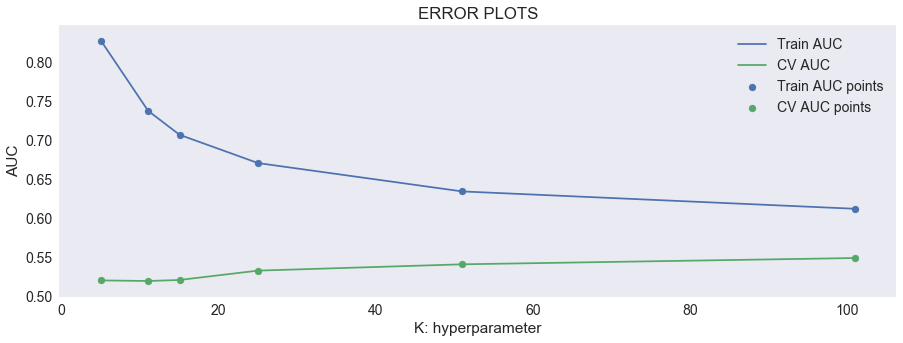

In [98]:
BestK( xtr2Top2k, xcv2Top2k, ytrain, ycv )
# BestK( xtr, xcv, ytr, ycv )

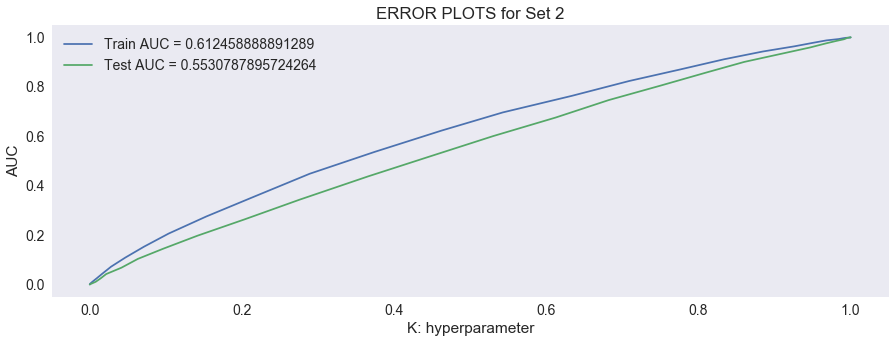

Confusion Matrix for Train of Set  2
 The maximum value of tpr*(1-fpr) =  0.33559248631460303  for threshold =  0.842
[[ 1861  1602]
 [ 7158 11824]]


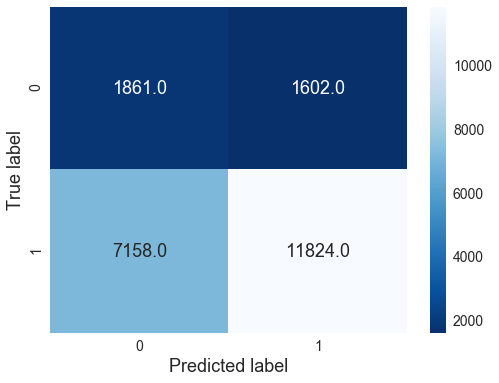



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.28661179516897684  for threshold =  0.851
[[1396 1150]
 [6660 7294]]


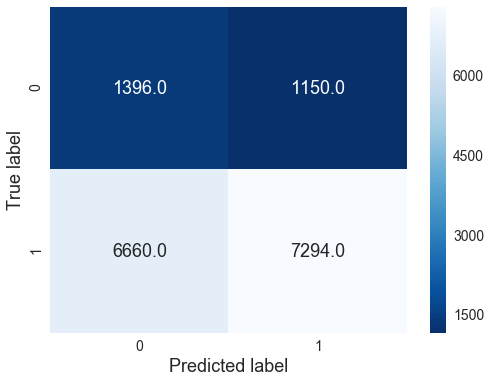

In [101]:
bestK = 101

roc( xtr2Top2k, xte2Top2k, ytrain, ytest, bestK, 2 )

print(' '*5, '- First -', ' '*9, '- Second -', ' '*9, '- Third -', ' '*9, '- Fourth -', ' '*9, '- Fifth -', ' '*9, '- Sixth -')
for i in range(0,6):
    print('#'*20, end =' ' )


# Operations on set 3 Avg w2v

      - First -           - Second -           - Third -           - Fourth -           - Fifth -           - Sixth -
#################### #################### #################### #################### #################### #################### 

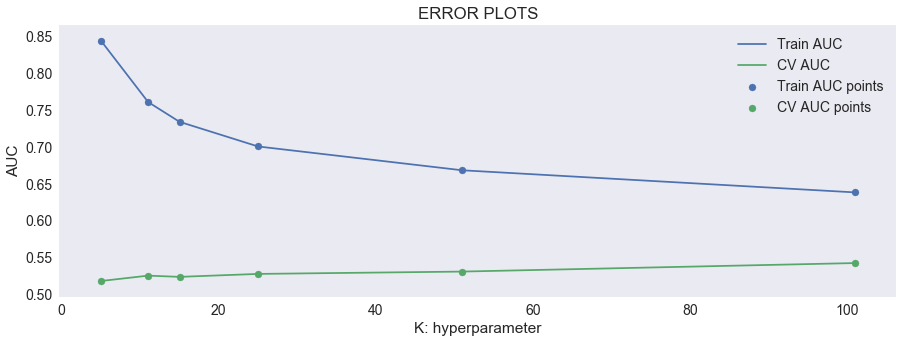

In [99]:
BestK( xtr3, xcv3, ytrain, ycv )

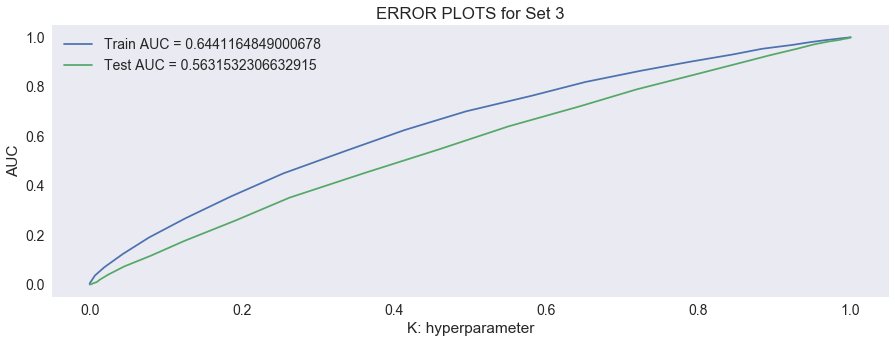

Confusion Matrix for Train of Set  3
 The maximum value of tpr*(1-fpr) =  0.3663190438968687  for threshold =  0.857
[[ 2030  1433]
 [ 7120 11862]]


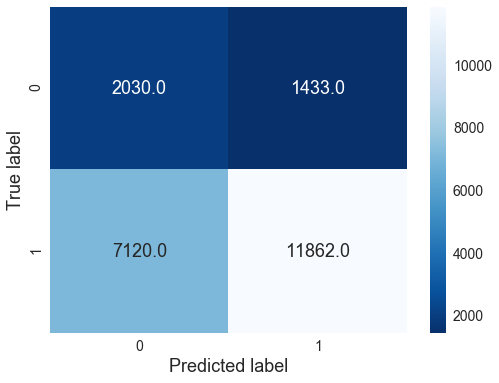



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.29579042169867753  for threshold =  0.857
[[1376 1170]
 [6317 7637]]


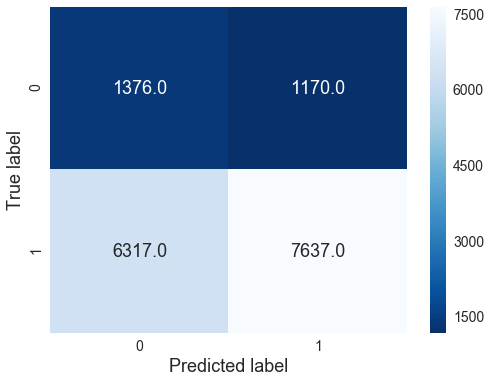

In [102]:
bestK = 91

roc( xtr3, xte3, ytrain, ytest, bestK, 3 )

# Operations on set 4 Weighted w2v

      - First -           - Second -           - Third -           - Fourth -           - Fifth -           - Sixth -
#################### #################### #################### #################### #################### #################### 

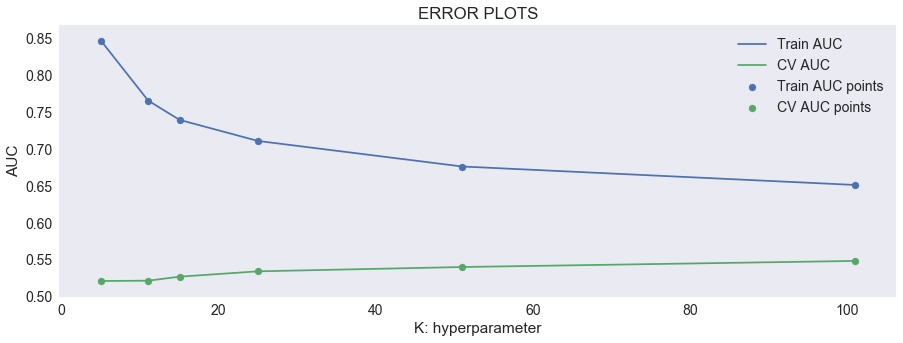

In [100]:
BestK( xtr4, xcv4, ytrain, ycv )

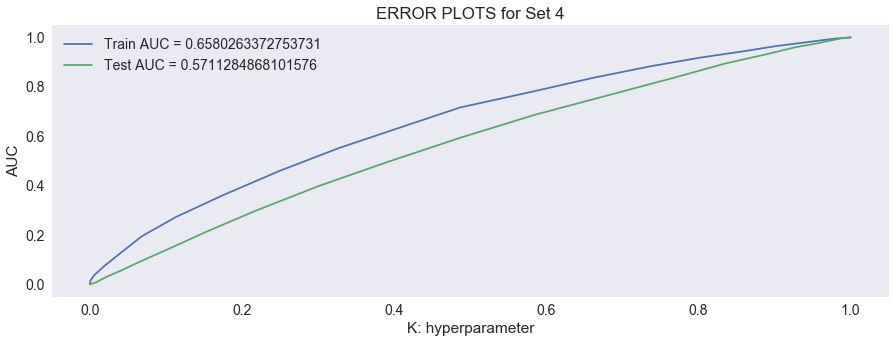

Confusion Matrix for Train of Set  4
 The maximum value of tpr*(1-fpr) =  0.3760163929333725  for threshold =  0.855
[[ 2048  1415]
 [ 6913 12069]]


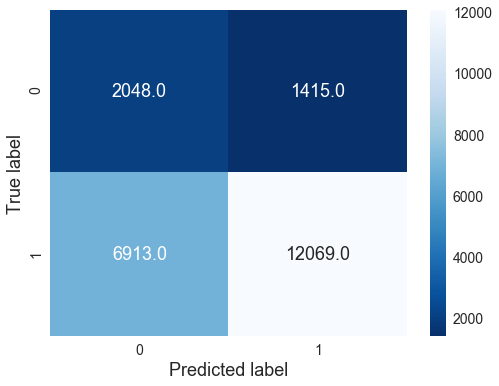



Confusion Matrix for Test 1 
 The maximum value of tpr*(1-fpr) =  0.3043867286531518  for threshold =  0.843
[[1301 1245]
 [5642 8312]]


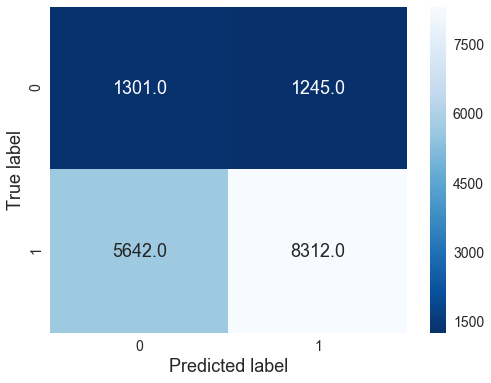

In [103]:
bestK = 83

roc( xtr4, xte4, ytrain, ytest, bestK, 4 )

In [104]:
from prettytable import PrettyTable
    
x = PrettyTable()


x.field_names = [" Vectorizer ", " Best K ", " Train AUC ", " Test AUC "]

x.add_row( [ " B.O.W ", " 101 ", " 0.6484 ", " 0.5900 " ] ) 
x.add_row( [ " TFIDF ", " 101 ", " 0.6124 ", " 0.5530 " ] )
x.add_row( [ " Avg W2V ", " 91 ", " 0.6441 ", " 0.5631 " ] )
x.add_row( [ " WW2V ", " 83 ", " 0.6580 ", " 0.5711 " ] )

print( x )

# Ref : http://zetcode.com/python/prettytable/

+--------------+----------+-------------+------------+
|  Vectorizer  |  Best K  |  Train AUC  |  Test AUC  |
+--------------+----------+-------------+------------+
|    B.O.W     |   101    |    0.6484   |   0.5900   |
|    TFIDF     |   101    |    0.6124   |   0.5530   |
|   Avg W2V    |    91    |    0.6441   |   0.5631   |
|     WW2V     |    83    |    0.6580   |   0.5711   |
+--------------+----------+-------------+------------+


## Conclusions


Weighted Word to Vec approach gives the best result in Train AUC 

Out of all the other approaches B.O.W. approach has the highest Test AUC